# Getting Started with DNN 2

## Part 1 Binary classification problem

### The IMDB dataset

In [1]:
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


### Preparing the data

In [2]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))  # Create an all-zero matrix of shape (len(sequences), dimension)
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### Network architecture

In [12]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Input((10000,)))
# network.add(layers.Dense(10000, activation='relu'))
network.add(layers.Dense(16, activation='relu'))
network.add(layers.Dense(16, activation='relu'))
network.add(layers.Dense(1, activation='sigmoid'))

### Network training

In [13]:
network.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

### Validation

In [5]:
from sklearn.model_selection import train_test_split

x_valid, x_test, y_valid, y_test = train_test_split(x_test, y_test, test_size=0.6, random_state=42)

In [6]:
x_valid.shape

(10000, 10000)

In [14]:
history = network.fit(x=x_train, y=y_train, epochs=20, batch_size=512, validation_data=(x_valid, y_valid))

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - accuracy: 0.7307 - loss: 0.5609 - val_accuracy: 0.8787 - val_loss: 0.3494
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9080 - loss: 0.2873 - val_accuracy: 0.8778 - val_loss: 0.3072
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9252 - loss: 0.2148 - val_accuracy: 0.8815 - val_loss: 0.2980
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9374 - loss: 0.1777 - val_accuracy: 0.8782 - val_loss: 0.3064
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9470 - loss: 0.1568 - val_accuracy: 0.8789 - val_loss: 0.3059
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9533 - loss: 0.1429 - val_accuracy: 0.8778 - val_loss: 0.3248
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9582 - loss: 0.1212 - val_accuracy: 0.8740 - val_loss: 0.3419
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9635 - loss: 0.1105 - val_accuracy: 0.8705 - v

In [15]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

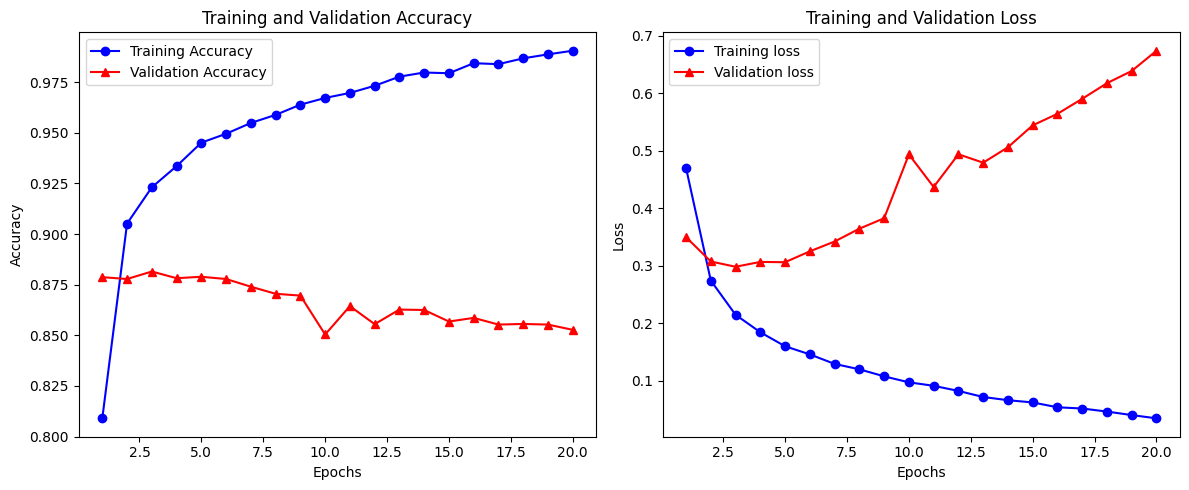

In [23]:
import matplotlib.pyplot as plt

epochs = range(1, len(history_dict['loss']) + 1)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(epochs, history_dict['accuracy'], 'bo-', label='Training Accuracy')
ax[0].plot(epochs, history_dict['val_accuracy'], 'r^-', label='Validation Accuracy')
ax[0].set_title('Training and Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend()

ax[1].plot(epochs, history_dict['loss'], 'bo-', label='Training loss')
ax[1].plot(epochs, history_dict['val_loss'], 'r^-', label='Validation loss')
ax[1].set_title('Training and Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend()

fig.tight_layout()
plt.show()

In [25]:
score, acc = network.evaluate(x_test, y_test, batch_size=512)

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8552 - loss: 0.6336


## Part 2 Hyperparameters